# (Basic) Artificial Neural Networks Project

#### For the course Complete Tensorflow 2 and Keras Deeplearning Bootcamp

We will use a subset of the [LendingClub dataset](https://www.kaggle.com/wordsforthewise/lending-club) obtained from Kaggle. LendingClub is a US peer-to-peer lending company. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission, and to offer loan trading on a secondary market. 

Our goal is to build a model that can predict wether or nor a borrower will pay back their loan.

## Data Overview

In [1]:
import pandas as pd

# Let's see the description for each column
data_info_df = pd.read_csv('data/lending_club_info.csv', index_col='LoanStatNew')
data_info_df

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [2]:
# Function to obtain the description for a given column name

def print_column_description(column_name):
    print(f"Column '{column_name}': {data_info_df.loc[column_name]['Description']}")
    
print_column_description("initial_list_status")

Column 'initial_list_status': The initial listing status of the loan. Possible values are – W, F


In [3]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
loan_df = pd.read_csv('data/lending_club_loan_two.csv')
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

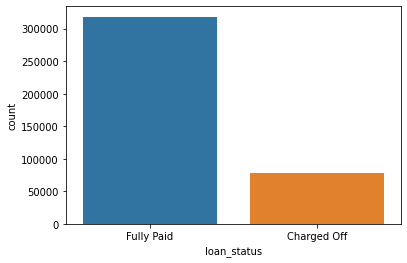

In [6]:
# Let's see the information the variable to predict
sns.countplot(data=loan_df, x='loan_status')

In [7]:
# Let's see the loan_amnt feature
print_column_description(column_name="loan_amnt")

Column 'loan_amnt': The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


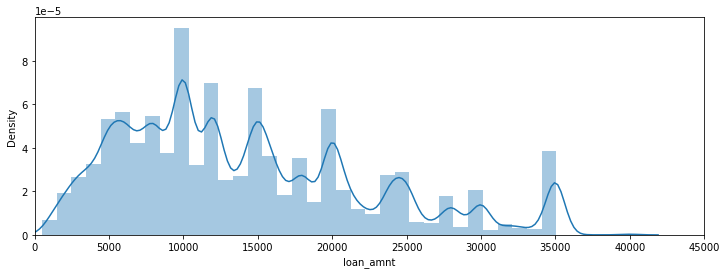

In [8]:
plt.figure(figsize=(12, 4));
sns.distplot(loan_df['loan_amnt'], kde=True, bins=40);
plt.xlim(0, 45000);

In [9]:
# Let's observe the correlation between the numerical features
loan_df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


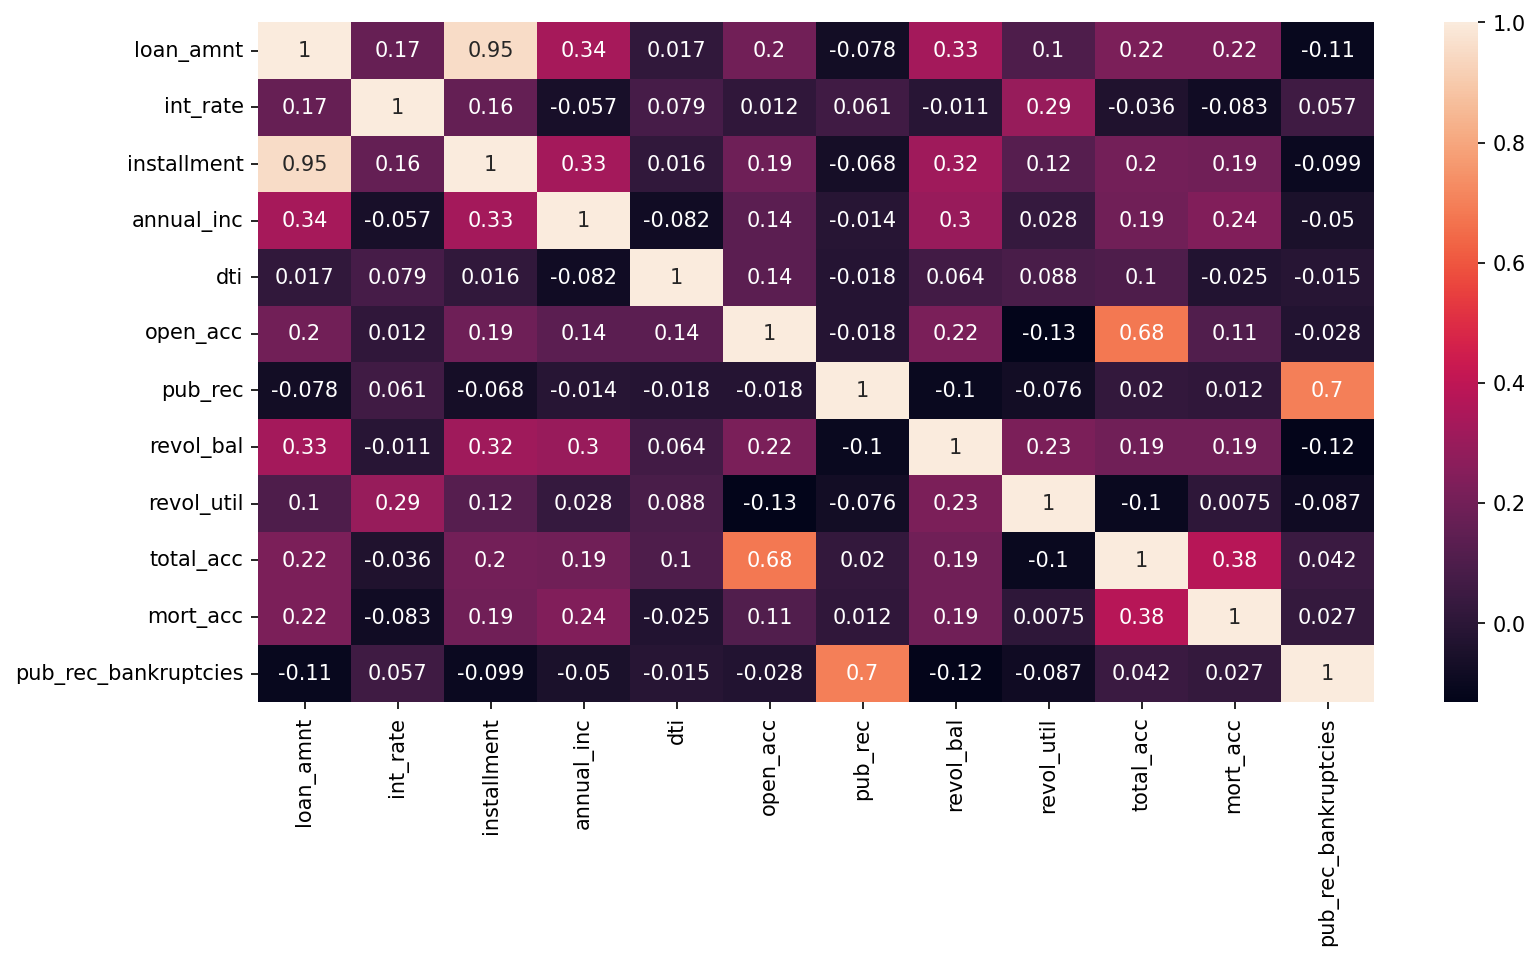

In [10]:
plt.figure(figsize=(12,6), dpi=150);
sns.heatmap(loan_df.corr(), annot=True);

We have a strong correlation between "loan_amnt" and "installment". Let's explore that feature a little further.

In [11]:
print_column_description(column_name="loan_amnt")
print_column_description(column_name="installment")

Column 'loan_amnt': The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
Column 'installment': The monthly payment owed by the borrower if the loan originates.


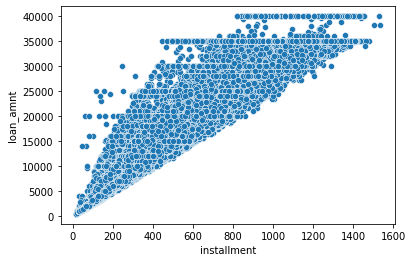

In [12]:
sns.scatterplot(data=loan_df, x="installment", y="loan_amnt");

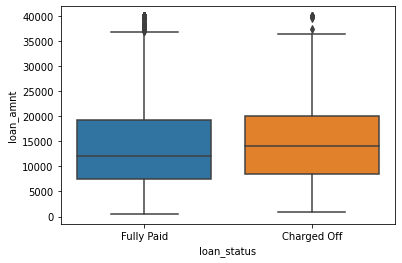

In [13]:
# Let's observe loan_status and loan_amount
sns.boxplot(data=loan_df, x="loan_status", y="loan_amnt");

In [14]:
loan_df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [15]:
# Let's explore the grade and sub_grade features
print_column_description(column_name="grade")
print_column_description(column_name="sub_grade")

Column 'grade': LC assigned loan grade
Column 'sub_grade': LC assigned loan subgrade


In [16]:
loan_df["grade"].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [17]:
loan_df["sub_grade"].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

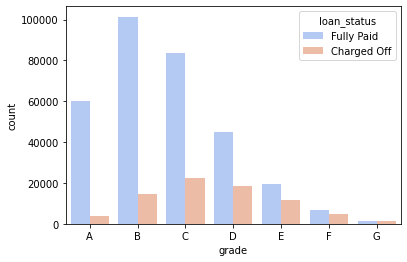

In [18]:
sns.countplot(data=loan_df, x="grade", order=sorted(loan_df["grade"].unique()), palette='coolwarm', hue='loan_status');

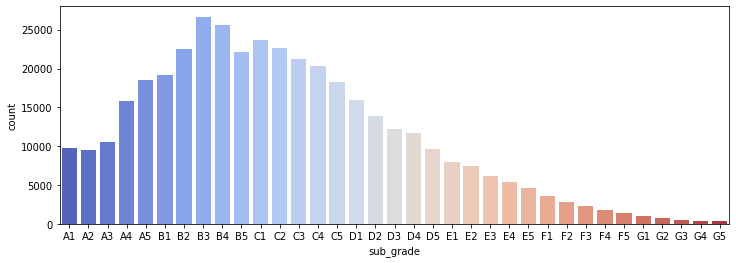

In [19]:
plt.figure(figsize=(12, 4));
subgrade_order = sorted(loan_df["sub_grade"].unique())
sns.countplot(data=loan_df, x="sub_grade", order=subgrade_order, palette="coolwarm");

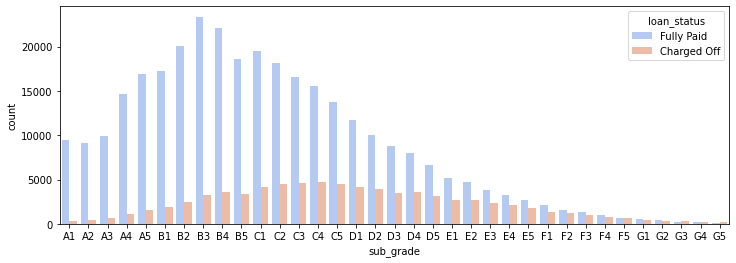

In [20]:
# Now taking into account loan_status
plt.figure(figsize=(12, 4));
sns.countplot(data=loan_df, x="sub_grade", order=subgrade_order, palette='coolwarm', hue='loan_status');

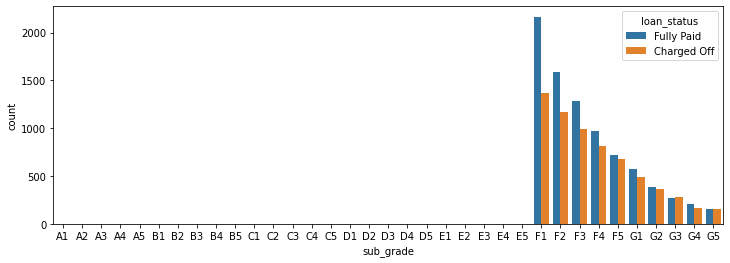

In [21]:
# It seems that F and G are not being pay as often as the rest. Let's isolate them
f_and_g = loan_df[(loan_df["grade"] == "G") | (loan_df["grade"] == "F")]

plt.figure(figsize=(12, 4));
sns.countplot(data=f_and_g, x="sub_grade", order=subgrade_order, hue="loan_status");

In [22]:
# Let's create a new column that will be a map of load_status
loan_df["loan_repaid"] = loan_df["loan_status"].map({"Fully Paid": 1, "Charged Off": 0})
loan_df[["loan_status", "loan_repaid"]]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


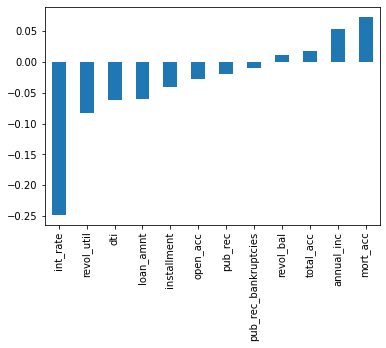

In [23]:
# Let's show the correlation between this column and all the numerical features
loan_df.corr()["loan_repaid"].sort_values().drop("loan_repaid").plot(kind="bar");

## Data Preprocessing

In [24]:
# Let's see if we have missing values
loan_df.isna().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_repaid                 0
issue_d                     0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
purpose                     0
loan_status                 0
address                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
loan_amnt                   0
dtype: int64

In [25]:
# Let's see them in terms of percentage
100 * loan_df.isna().sum().sort_values(ascending=False) / len(loan_df)

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
loan_repaid             0.000000
issue_d                 0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
purpose                 0.000000
loan_status             0.000000
address                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
loan_amnt               0.000000
dtype: float64

In [26]:
# Let's check for the description of emp_title and emp_lenght to see if is ok to drop those columns
print_column_description(column_name="emp_title")
print_column_description(column_name="emp_length")

Column 'emp_title': The job title supplied by the Borrower when applying for the loan.*
Column 'emp_length': Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [27]:
# Let's see how many unique values we have for emp_title
loan_df["emp_title"].value_counts()

Teacher                             4389
Manager                             4250
Registered Nurse                    1856
RN                                  1846
Supervisor                          1830
                                    ... 
Enrollment counselor                   1
lead application developer             1
St. Vrain Valley School District       1
Tarbut V'Torah                         1
Raymond James Financial Services       1
Name: emp_title, Length: 173105, dtype: int64

In [28]:
# We have to many unique values for emp_title to try to convert those to dummy variables. We will drop this column
loan_df = loan_df.drop("emp_title", axis=1)

In [29]:
# Let's now check for emp_length
loan_df["emp_length"].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

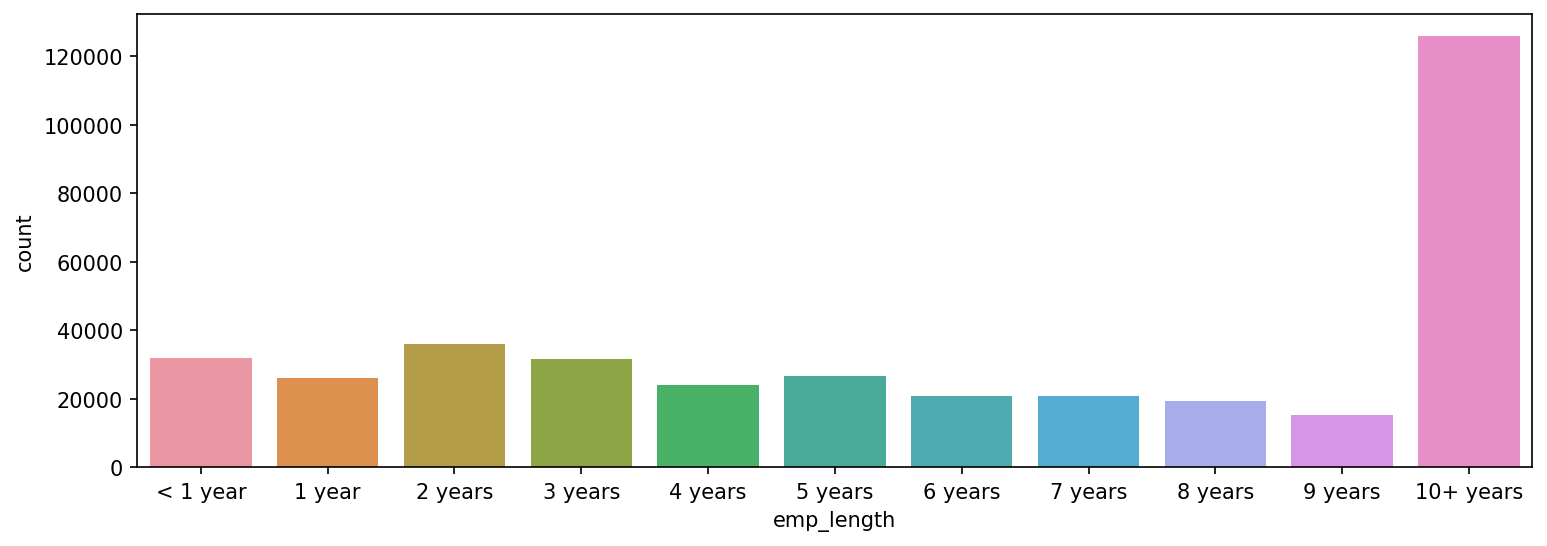

In [30]:
# Let's plot this information
emp_length_order = ["< 1 year", "1 year", "2 years", "3 years", "4 years", "5 years", "6 years", "7 years", 
                    "8 years", "9 years", "10+ years"]
plt.figure(figsize=(12, 4), dpi=150)
sns.countplot(data=loan_df, x="emp_length", order=emp_length_order);

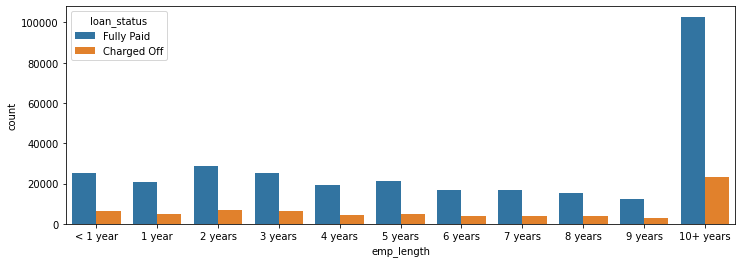

In [31]:
# Taking into account loan_status
plt.figure(figsize=(12, 4));
sns.countplot(data=loan_df, x="emp_length", order=emp_length_order, hue="loan_status");

Let's calculate the percentage of people per employment category that didn't pay back their loan.

In [32]:
emp_charged_off = loan_df[loan_df["loan_status"] == "Charged Off"].groupby("emp_length").count()["loan_status"]
emp_charged_off

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [33]:
emp_fully_paid = loan_df[loan_df["loan_status"] == "Fully Paid"].groupby("emp_length").count()["loan_status"]
emp_fully_paid

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

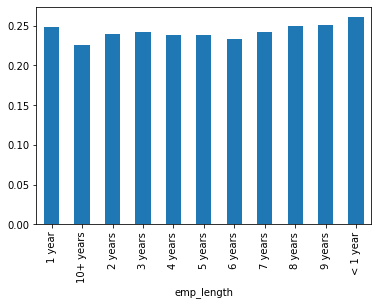

In [34]:
emp_perc = emp_charged_off / emp_fully_paid
emp_perc.plot(kind="bar");

Since the percentage is very similar across all categories, let's drop that column.

In [35]:
loan_df = loan_df.drop("emp_length", axis=1)

In [36]:
loan_df.isna().sum().sort_values(ascending=False)

mort_acc                37795
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_status                 0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_repaid                 0
purpose                     0
address                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
loan_amnt                   0
dtype: int64

In [37]:
print_column_description("title")
print_column_description("purpose")

Column 'title': The loan title provided by the borrower
Column 'purpose': A category provided by the borrower for the loan request. 


In [38]:
loan_df["title"].value_counts()

Debt consolidation                        152472
Credit card refinancing                    51487
Home improvement                           15264
Other                                      12930
Debt Consolidation                         11608
                                           ...  
thankyouloan                                   1
The last and only one                          1
Lending Club PL                                1
Personal Loan to consolidate some debt         1
Set for future                                 1
Name: title, Length: 48817, dtype: int64

In [39]:
loan_df["purpose"].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

It's seems that the title column is a description or subcategory of the loan purpose. Let's drop the column

In [40]:
loan_df = loan_df.drop("title", axis=1)

In [41]:
print_column_description(column_name="mort_acc")

Column 'mort_acc': Number of mortgage accounts.


In [42]:
loan_df["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [43]:
loan_df.corr()["mort_acc"].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

Let's try to fill the missing values for mort_acc with the mean for total_acc.

In [44]:
# Mean of mort_acc column per total_acc
total_acc_mean = loan_df.groupby("total_acc").mean()
total_acc_mean = total_acc_mean["mort_acc"]
total_acc_mean

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [45]:
def fill_na_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_mean[total_acc]
    else:
        return mort_acc

In [46]:
loan_df["mort_acc"] = loan_df.apply(lambda x: fill_na_mort_acc(x["total_acc"], x["mort_acc"]), axis=1)

In [47]:
100 * loan_df.isna().sum().sort_values(ascending=False) / len(loan_df)

pub_rec_bankruptcies    0.135091
revol_util              0.069692
loan_repaid             0.000000
loan_status             0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
dti                     0.000000
purpose                 0.000000
address                 0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
loan_amnt               0.000000
dtype: float64

Both pub_rec_bankruptcies and revol_util have missing values, but they represent less than 0.5% of the data. Let's drop those columns.

In [48]:
loan_df = loan_df.dropna()
loan_df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical and Dummy Variables

We had deal with the missing values, let's now focus in the categorical values and their transformation to dummy variables.

In [49]:
# What categorical variables do we have
loan_df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [50]:
loan_df["term"].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [51]:
# Let's change those to numeric 36 or 60
loan_df["term"] = loan_df["term"].apply(lambda term: int(term[:3]))
loan_df["term"]

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

We know that the values of grade column can be seen in subgrade. Let's drop the column.

In [52]:
loan_df = loan_df.drop("grade", axis=1)

Let's change the subgrade variable to dummy variables.

In [53]:
subgrade_dummies = pd.get_dummies(loan_df["sub_grade"], drop_first=True)
loan_df = pd.concat([loan_df.drop("sub_grade", axis=1), subgrade_dummies], axis=1)
loan_df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [54]:
loan_df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [55]:
#loan_df["home_ownership"].value_counts()
#loan_df["verification_status"].value_counts()
#loan_df["issue_d"].value_counts()
#loan_df["application_type"].value_counts()
#loan_df["initial_list_status"].value_counts()
#loan_df["purpose"].value_counts()
#loan_df["address"].value_counts()
#loan_df["earliest_cr_line"].value_counts()

In [56]:
# Getting dummies for the categorical values with fewer unique values
dummies = pd.get_dummies(loan_df[["verification_status", "application_type", "initial_list_status", "purpose"]], drop_first=True)
loan_df = loan_df.drop(["verification_status", "application_type", "initial_list_status", "purpose"], axis=1)
loan_df = pd.concat([loan_df, dummies], axis=1)
loan_df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Some of the possible values for home_ownership are None and Any. 
# Lets change those to Other, and get the dummy variables
loan_df["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [58]:
loan_df["home_ownership"] = loan_df["home_ownership"].replace(["NONE", "ANY"], "OTHER")

dummies = pd.get_dummies(loan_df["home_ownership"], drop_first=True)
loan_df = loan_df.drop("home_ownership", axis=1)
loan_df = pd.concat([loan_df, dummies], axis=1)
loan_df

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,...,0,0,0,0,0,0,0,0,0,1
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,...,0,0,0,0,0,0,0,0,0,1
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# For address, let's create a zip value, 
loan_df["address"].value_counts()

USNS Johnson\r\nFPO AE 05113                                    8
USCGC Smith\r\nFPO AE 70466                                     8
USS Smith\r\nFPO AP 70466                                       8
USS Johnson\r\nFPO AE 48052                                     8
USNS Johnson\r\nFPO AP 48052                                    7
                                                               ..
10595 Pamela Springs\r\nBriannachester, WY 05113                1
6670 Mckay Circle Apt. 171\r\nPoolestad, CA 48052               1
797 James Manor Suite 417\r\nAndreaville, VA 05113              1
0196 Heather Branch Suite 623\r\nPort Nancychester, OK 22690    1
946 Smith Port Suite 970\r\nLake Valerieview, MD 48052          1
Name: address, Length: 392898, dtype: int64

In [60]:
loan_df['zip_code'] = loan_df['address'].apply(lambda address: address[-5:])

# And create dummy variables from those zip codes

dummies = pd.get_dummies(loan_df["zip_code"], drop_first=True)
loan_df = loan_df.drop(["zip_code","address"], axis=1)
loan_df = pd.concat([loan_df, dummies], axis=1)

In [61]:
print_column_description(column_name="issue_d")

Column 'issue_d': The month which the loan was funded


In [62]:
# Since we wouldn't know beforehand whether or not a loan would be issued when using our model,
# we don't know nor need issue_date. Let's drop this feature.

loan_df = loan_df.drop("issue_d", axis=1)

In [63]:
# Let's see earliest_cr_line values

print_column_description(column_name="earliest_cr_line")
loan_df["earliest_cr_line"].value_counts()

Column 'earliest_cr_line': The month the borrower's earliest reported credit line was opened


Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jun-1955       1
Sep-1957       1
Mar-1960       1
Jan-1944       1
Jul-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [64]:
# Let's keep the year as a numerical value and drop the column

loan_df["earliest_cr_year"] = loan_df["earliest_cr_line"].apply(lambda date: int(date[-4:]))
loan_df = loan_df.drop("earliest_cr_line", axis=1)

In [65]:
# loan_status is the variable to predict, but we already have loan_repaid
print(loan_df.select_dtypes(['object']).columns)
print("\n Loan repaid")
print(loan_df["loan_repaid"].value_counts())

# Let's drop loan_status
loan_df = loan_df.drop("loan_status", axis=1)

Index(['loan_status'], dtype='object')

 Loan repaid
1    317696
0     77523
Name: loan_repaid, dtype: int64


## Training and Validation Sets

In [66]:
from sklearn.model_selection import train_test_split

# For ANN we need the data as numpy arrays, that's why we ask for .values
X = loan_df.drop("loan_repaid", axis=1).values
y = loan_df["loan_repaid"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=52)

## Normalizing Data

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

In [68]:
# Imports

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [69]:
# We will create a model that goes 78 --> 39 --> 19 --> 1

model = Sequential()

# input layer. Nodes in the input layer correspond to the number of features
model.add(Dense(78,  activation="relu"))
model.add(Dropout(0.2)) # regularization technique to avoid overfitting

# hidden layer
model.add(Dense(39,  activation="relu"))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19,  activation="relu"))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1, activation="sigmoid")) # sigmoid activation ensures as that the output will be between 0 and 1

# compile with loss binary_crossentropy (used for binary classification tasks)
model.compile(loss="binary_crossentropy", optimizer="adam")

In [70]:
# Let's fit the model
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.3027 - val_loss: 0.2633
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2667 - val_loss: 0.2613
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2637 - val_loss: 0.2614
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2620 - val_loss: 0.2609
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2616 - val_loss: 0.2611
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2606 - val_loss: 0.2608
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2605 - val_loss: 0.2608
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2599 - val_loss: 0.2609
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2597 - val_loss: 0.2605
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.259

In [71]:
# We could save the model as follows
# model.save('full_data_project_model.h5')  

## Performance Evaluation

In [72]:
# Let's plot the validation losses vs training losses

losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.302696,0.263314
1,0.266695,0.261308
2,0.263657,0.261420
3,0.262048,0.260913
4,0.261569,0.261147
5,0.260648,0.260820
6,0.260512,0.260782
7,0.259861,0.260870
8,0.259722,0.260453
9,0.259167,0.260775


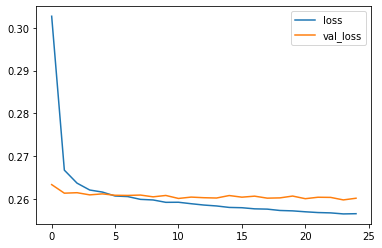

In [73]:
losses[["loss", "val_loss"]].plot();

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# predict will be return values between 0 and 1, we want the predicted classes
predictions = model.predict_classes(X_test)
predictions

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.45      0.61     15536
           1       0.88      0.99      0.93     63508

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.89      0.89      0.87     79044



In [76]:
print(confusion_matrix(y_test, predictions))

[[ 7014  8522]
 [  357 63151]]
